In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/ETH-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-06,228.270004,232.779999,211.179993,229.520004,229.520004,273642406
1,2018-09-07,229.559998,234.149994,213.830002,215.139999,215.139999,157745814
2,2018-09-08,215.139999,220.020004,190.080002,196.770004,196.770004,177137749
3,2018-09-09,196.770004,208.380005,185.009995,195.990005,195.990005,158079940
4,2018-09-10,195.990005,202.589996,186.919998,197.139999,197.139999,142204330


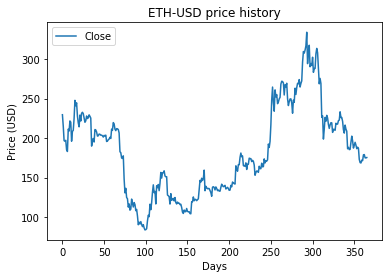

In [0]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(df["Close"])
plt.title('ETH-USD price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Close'], loc='upper left')
plt.show()

In [0]:
print("checking if any null values are present\n", df.isna().sum())

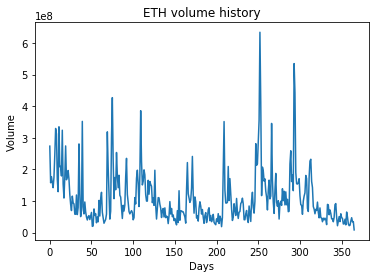

In [0]:
import numpy as np
train_col = ["Close"]
x = df.loc[:, train_col].values
X = np.array(x).flatten()
print(len(X))

366


In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	a, b = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		a.append(seq_x)
		b.append(seq_y)
	return np.array(a), np.array(b)
 
# define input sequence
raw_seq =X
# choose a number of time steps
n_steps = 3
# split into samples
a, b = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(a)):
	print(a[i], b[i])

[229.520004 215.139999 196.770004] 195.990005
[215.139999 196.770004 195.990005] 197.139999
[196.770004 195.990005 197.139999] 185.149994
[195.990005 197.139999 185.149994] 183.029999
[197.139999 185.149994 183.029999] 211.270004
[185.149994 183.029999 211.270004] 208.869995
[183.029999 211.270004 208.869995] 221.63000499999998
[211.270004 208.869995 221.630005] 220.11999500000002
[208.869995 221.630005 220.119995] 196.03999299999998
[221.630005 220.119995 196.039993] 208.389999
[220.119995 196.039993 208.389999] 209.77999900000003
[196.039993 208.389999 209.779999] 224.75999500000003
[208.389999 209.779999 224.759995] 247.690002
[209.779999 224.759995 247.690002] 240.77999900000003
[224.759995 247.690002 240.779999] 244.55000299999998
[247.690002 240.779999 244.550003] 227.919998
[240.779999 244.550003 227.919998] 219.19999700000002
[244.550003 227.919998 219.199997] 214.210007
[227.919998 219.199997 214.210007] 229.08999599999999
[219.199997 214.210007 229.089996] 221.559998
[214.210

In [0]:
a = a.reshape((a.shape[0], a.shape[1], 1))
print(a)

[[[229.520004]
  [215.139999]
  [196.770004]]

 [[215.139999]
  [196.770004]
  [195.990005]]

 [[196.770004]
  [195.990005]
  [197.139999]]

 ...

 [[171.419998]
  [178.759995]
  [179.130005]]

 [[178.759995]
  [179.130005]
  [175.009995]]

 [[179.130005]
  [175.009995]
  [174.889999]]]


In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(a, b, epochs=200, verbose=0)

Using TensorFlow backend.
W0906 13:09:22.464646 140713309116288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 13:09:22.501625 140713309116288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 13:09:22.508267 140713309116288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 13:09:22.847682 140713309116288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 13:09:23.065248 14071330

In [0]:
model.save_weights("model.h5")

[[174.0706]]


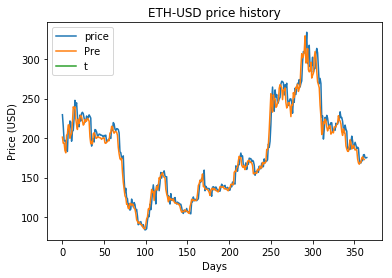

In [0]:

tomo = np.array([175.01,174.38,176.81])
t = tomo.reshape((1, 3, 1))
prro = model.predict(t, verbose=0)
pre = model.predict(a, verbose=0)
print(prro)
plt.figure()
plt.plot(df["Close"])
plt.plot(pre)
plt.plot(prro)
plt.title('ETH-USD price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['price','Pre', 't'], loc='upper left')
plt.show()
